# Bachelorproject

- Deskriptiv statestik: Scatterplot over marketshare
Kan også tage et plot af udviklingen af prices/Udvalget af brands/Isoloere data INDEN Regressionsdata
Herefter log marketshare mod prisen for en kontant
- Ret linje gennem punkter
Herefter flere forklarende, fat I product attributes
- Log marketshare venstre side
    - Markedet og modeller

Spørgsmål herfra:
- Herefter variere produkts på tværs af dem
    - Flere forklarende variable og finde koefficienter af dem
- Forhåbentligt positive på dem der er gode
    - Dårlige på dem der er dårlige 
- Priser i den samme valuta?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
plt.style.use('ggplot')
#pd.set_option('max_rows',200) 
pd.set_option('display.float_format', '{:.4f}'.format) # Set decimals 


# Plot choices
sns.set(style="whitegrid")

# Scatterplot for Marketshares

(11549, 47)


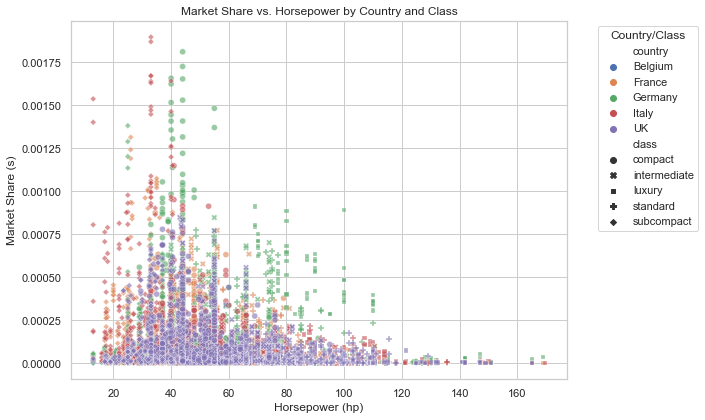

In [2]:
# Import data
cars = pd.read_csv('cars.csv')

print(cars.shape)

#Data Import and Cleaning: Dataset has been importet and replaced commas with dots in numerical columns. 
#for converting these columns to a float type for calculations.

#Label Mapping: Mapping categorical variables like market indices to country names and class indices 
#to class names, which will make the analysis more interpretable.

#Market Share Calculation: Calculated the total sales per market and year, 
#and then used these totals to calculate the market share for each car. There is also being calculated the 
#logarithm of the market share, which is a useful transformation for analysis.

#Visualization Preparation: With the data cleaned and enriched with calculated fields, 
#the visualization is ready the market shares.


cars['hp'] = cars['hp'].str.replace(',', '.').astype(float)
cars['li'] = cars['li'].str.replace(',', '.').astype(float)
cars['li1'] = cars['li1'].str.replace(',', '.').astype(float)
cars['li2'] = cars['li2'].str.replace(',', '.').astype(float)
cars['li3'] = cars['li3'].str.replace(',', '.').astype(float)
cars['ngdp'] = cars['ngdp'].str.replace(',', '.').astype(float) # National GDP
cars['rgdp'] = cars['rgdp'].str.replace(',', '.').astype(float) #Regional GDP
cars['princ'] = cars['princ'].str.replace(',', '.').astype(float) #Price/Income - pris med inflation
cars['pr'] = cars['pr'].str.replace(',', '.').astype(float)
cars['tax'] = cars['tax'].str.replace(',', '.').astype(float)
cars['avdexr'] = cars['avdexr'].str.replace(',', '.').astype(float)
cars['ac'] = cars['ac'].str.replace(',', '.').astype(float) #acceleration
cars['le'] = cars['le'].str.replace(',', '.').astype(float) #length
cars['sp'] = cars['sp'].str.replace(',', '.').astype(float) #speed
#cars['we'] = cars['we'].str.replace(',', '.').astype(float) #weight






labs = pd.read_csv('labels_values.csv')
dict_varnames = pd.read_csv('labels_variables.csv').set_index('variable').to_dict()['label']

# to translate market indices to names of countries 
labs.index += 1 
dict_ma = labs.market.dropna().to_dict()



#'qu_total': Total sales, 'qu,' for each market, 'ma' and year, 'ye'.
cars['qu_total'] = cars.groupby(['ma','ye'])['qu'].transform('sum')
cars['qu_total'] = cars['qu'].sum()

#'s': Market share is the relation between'qu' and 'qu_total'
#Quantity of goods/the total quantity
cars['s'] = cars['qu'] / (cars['qu_total'])

cars['log_s'] = np.log(cars['s']) #måske /(0.5)

cars['country'] = cars['ma'].map(dict_ma)

dict_cla = labs.classs.dropna().to_dict()
cars['class'] = cars['cla'].map(dict_cla)


# Set the figure size for the scatterplot
plt.figure(figsize=(10, 6))



# Create a scatterplot with, in this case horsepower, as the x-axis and market share as the y-axis.
# 'hue' assigns different colors to different countries, making it easier to distinguish between them.
# 'style' assigns different markers to different car classes, adding another layer of differentiation.
# 'alpha' sets the transparency of the points, making the plot easier to read when points overlap.
sns.scatterplot(data=cars, x='hp', y='s', hue='country', style='class', alpha=0.6)

# Set the title of the plot
plt.title('Market Share vs. Horsepower by Country and Class')

# Set the label for the x-axis
plt.xlabel('Horsepower (hp)')

# Set the label for the y-axis
plt.ylabel('Market Share (s)')

# Place a legend on the plot. 'bbox_to_anchor' and 'loc' help position the legend outside the plot area.
plt.legend(title='Country/Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()


#Gøre det på tværs af flere attributes
#Forholde sig til resultaterne



#Kunne tage gennemsnit af horsepower - bin scatters
#udvikling over tid for forskellige segmenter
#Histogram for mere overskuelighed

#eksempel : more acceleration, more marketshare 
#Log marketshare og plotte mod attributes + prices
#Mere horsepower uden forøgelse af pris - mere horsepower kan give lavere marketshare hvis prisen forøges
#Illustrere: Horsepower (mm.) ud og korelere med prisen. Positive attributes er også dyrere.


# Deskriptive:
# korrelere mod attributes og prices - prisen er korrileret med fejlledet (lædersædder osv)
# Vises med de korrilerbar attributes, så også med de 
# Udlader en varaible:
# Prisen er endogen da de simultant bestemt
# Fejlledet er korreleret med prisen, så vi prøver at estimere alpha alligevel med instrumentvariable:
# endogenitet: så prøver vi at korrelere fejlledet, men ingen data for det
# Potentielle attributes for fejlledet (lædersæder osv.) er korreleret med prisen og kan skabe et endogenitetsproblem

# Næste step: Hvorfor er priserne endogene (prisen påvirkes af faktorer i for modellen og 
# påvirker afhængige variabel, herunder market share)
    # De kan påvirkes, 
# Styr på figurerne
# Komme i bund med Anders' slides
# Vi har fundet alpha i anders' slides
# Prices and attributes for OLS
# 5 regressioner: en kun med prices, derefter en selected attribute
# Forklarende variable, med model dummy (Brands, mm.) - sm models
# Får en masse estimater ud som skal prøves at forklares
# Log_s mod s and p => herfra estimere med IV, herunder have instrumenter (BLP beskriver summen)
# summen af attributes 

#diskriptivt - linear analyse

- Lave et loop så man kan se over forskellige variable/attributes
- Marketshare mod flere attributes
- Måske i sub plots
- Måske log_marketshares
- Lave flere forskellige forskellige plots for hvert land

# Creating a Histogram for Horsepower Distribution Across All Countries

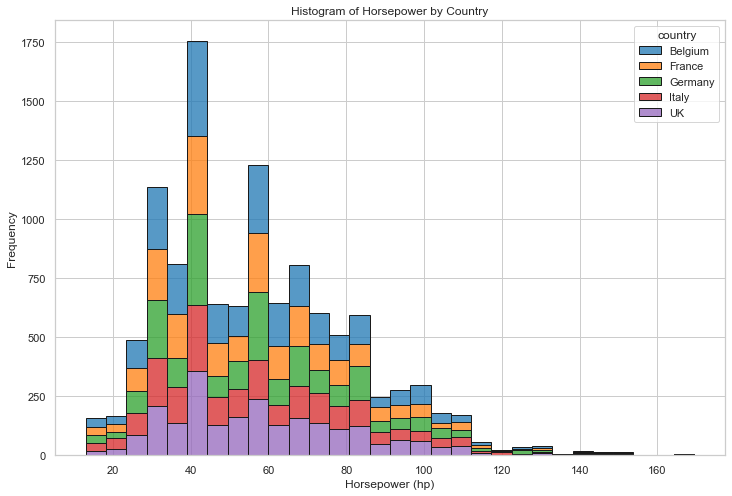

In [3]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a combined histogram with the 'hue' parameter to differentiate by country
sns.histplot(data=cars, x='hp', hue='country', multiple='stack', bins=30, palette='tab10', edgecolor='k')

# Set titles and labels
plt.title('Histogram of Horsepower by Country')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


- Bertel har lavet loop over det 
- Fordeling af horsepower i hvert land, 
- Alle biler folk ejer, mere retvisende billede
- Market_shares for horsepowers så man kan se det
- princs, we, le, ...
- Summe market_shares indenfor hvert interval


Denne graf viser et histogram over hestekraft (hp) fordelt på forskellige lande. Hver farve repræsenterer et land, og højden af de farvede søjler indikerer antallet af bilmodeller (frekvens) inden for et specifikt interval af hestekraft. For eksempel kan en høj søjle for Frankrig i intervallet 60-80 hp indikere, at der er mange franske bilmodeller med hestekræfter i dette område. Histogrammet giver et visuelt overblik over fordelingen af bilmodellers hestekræfter i de forskellige lande.

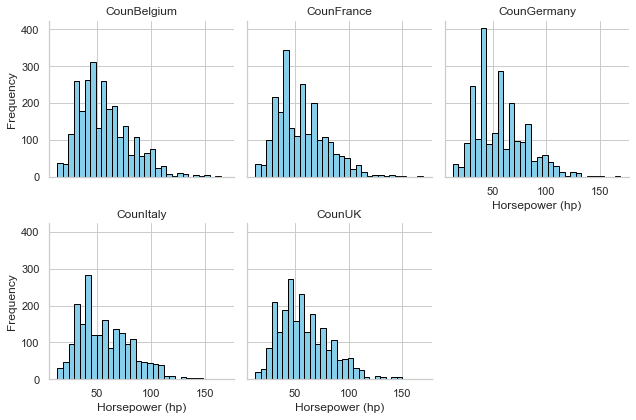

In [4]:
# Set up the FacetGrid with seaborn
g = sns.FacetGrid(cars, col='country', col_wrap=3, sharex=True, sharey=True)

# Map the histograms to the FacetGrid
g.map(plt.hist, 'hp', bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
g.set_titles('Coun{col_name}')
g.set_axis_labels('Horsepower (hp)', 'Frequency')

# Adjust the layout so that titles and labels don't overlap
g.tight_layout()

# Show the plot
plt.show()


Gøre så simpelt som muligt så det man vil træder frem
- Bare: col_name

# Average market share for each horsepower category per country

<Figure size 1008x504 with 0 Axes>

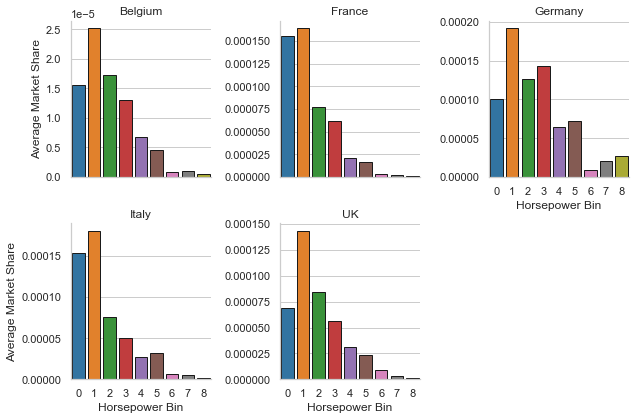

In [5]:
# Define the number of bins for horsepower
bins = np.linspace(cars['hp'].min(), cars['hp'].max(), num=10)

# Assign each car to a horsepower bin
cars['hp_bin'] = pd.cut(cars['hp'], bins, labels=np.arange(len(bins)-1))

# Group by country and horsepower bin, then calculate the average market share
avg_market_share = cars.groupby(['country', 'hp_bin'])['s'].mean().reset_index()

# Now plot the average market share for each country and horsepower bin as a bar plot
plt.figure(figsize=(14, 7))

# Because there are multiple countries and horsepower bins, we may choose to facet by country
# to make the plot clearer
g = sns.FacetGrid(avg_market_share, col='country', col_wrap=3, sharey=False)
g.map_dataframe(sns.barplot, x='hp_bin', y='s', palette='tab10', edgecolor='k')
g.set_axis_labels('Horsepower Bin', 'Average Market Share')
g.set_titles(col_template='{col_name}')

plt.show()


Hvis procent så *100

- Marketshares summer til 1
    - Summer de til 1 på tværs af alle lande, outside good osv.
    - Styr på definitionen

Forholde sig mere til figurerne:
- Tyskland kører på hlest hestekrafter, mens frankrig og italien kører på dem med lavest. 

Denne figur ser ud til at vise gennemsnitlig markedsandel fordelt på forskellige intervaller af hestekraft (hp) for forskellige lande: Belgien, Frankrig, Tyskland, Italien og Storbritannien. Hver undergraf repræsenterer et land, og søjlerne repræsenterer gennemsnitlig markedsandel inden for specifikke intervaller af hestekraft. Dette kan hjælpe med at forstå, hvordan markedsandelen fordeler sig over forskellige hestekraftintervaller i hvert land.

# Step 1: Creating a Histogram for Horsepower Distribution

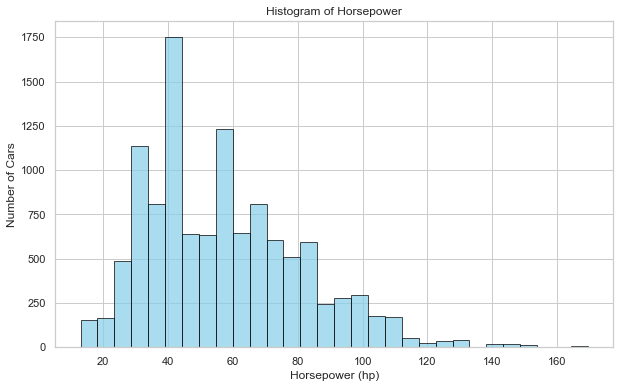

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(cars['hp'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Number of Cars')
plt.show()

Lave figur note her
- Hvad ser vi på figuren
    - Number of cars?
    - Forklare hvordan det er lavet
    - Aggregere forskellige models for horsepower
    - Selvfoklarende tabel
    - Færre bins (bins=30)

# Step 2: Creating a Binned Scatter Plot for Average Horsepower


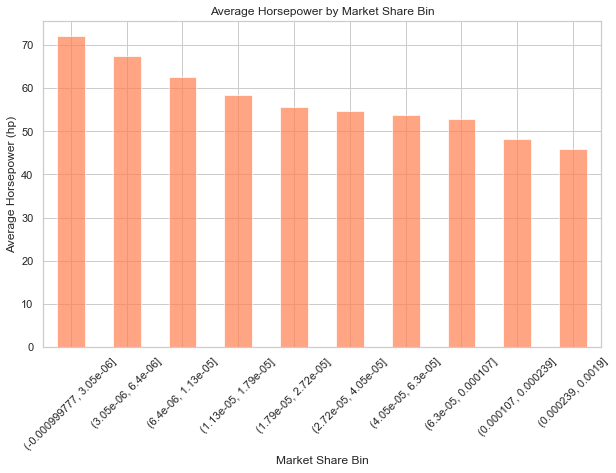

In [7]:
# Bin the market share data
cars['market_share_bin'] = pd.qcut(cars['s'], q=10, duplicates='drop')  # Creating 10 quantile-based bins

# Calculate the average horsepower for each bin
avg_hp_per_bin = cars.groupby('market_share_bin')['hp'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_hp_per_bin.plot(kind='bar', color='coral', alpha=0.7)
plt.title('Average Horsepower by Market Share Bin')
plt.xlabel('Market Share Bin')
plt.ylabel('Average Horsepower (hp)')
plt.xticks(rotation=45)
plt.show()


- Summe her også
- Binn scatter
    - x og y, laver bins, gennemsnittet for hvert bin
    - Summe marketshares på x aksen og horsepower på yaksen

Figuren viser et histogram, der repræsenterer gennemsnitlig hestekraft (hp) opdelt i forskellige intervaller af markedsandel (s). Hver søjle repræsenterer det gennemsnitlige antal hestekræfter for biler inden for et specifikt interval af markedsandele. Dette kan hjælpe med at forstå, hvordan hestekraften fordeler sig over biler med forskellige markedsandele; for eksempel kan det indikere, om biler med højere hestekraft tendens til at have større eller mindre markedsandel.

# Calculating Average Horsepower by Year


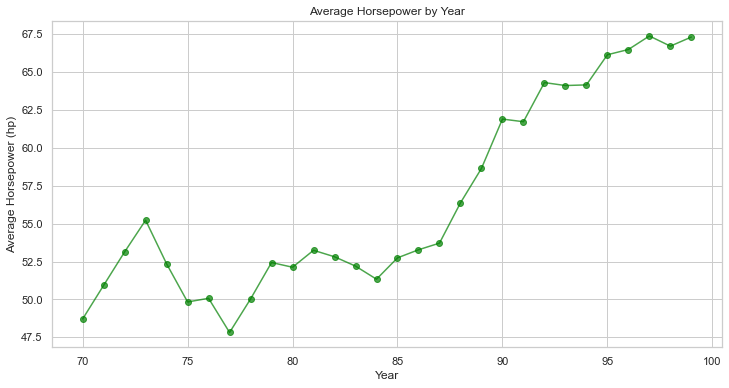

In [8]:
# Group by year and calculate the average horsepower
avg_hp_per_year = cars.groupby('ye')['hp'].mean()

# Plotting the average horsepower over years
plt.figure(figsize=(12, 6))
avg_hp_per_year.plot(kind='line', marker='o', color='green', alpha=0.7)
plt.title('Average Horsepower by Year')
plt.xlabel('Year')
plt.ylabel('Average Horsepower (hp)')
plt.grid(True)
plt.show()


- Average over forskellige alle brands
- Lave et vægtet gennemsnit så det er for lamboginier og toyotaer for sig kan man sige
- Alt vægtes med marketshares
- Manuelt regne ud evt. 

Denne figur viser en tidsserie for gennemsnitlig hestekraft (hp) for bilmodeller fra år til år. Fra grafen kan man se en generel stigende trend i hestekraft fra omkring 1970 til 1998, hvilket indikerer, at bilmodeller i gennemsnit er blevet mere kraftfulde over tid.

# Plotting Price Development for Selected Brands


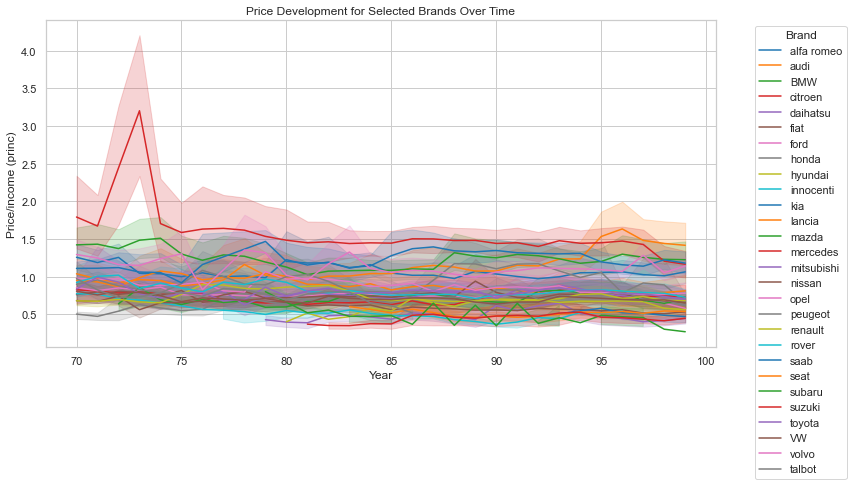

In [9]:
# Correctly handle infinite and missing values before any manipulation
cars.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter the dataset for selected brands
selected_brands = cars[cars['brand'].isin(['alfa romeo', 'audi', 'BMW', 'citroen', 'daihatsu', 'fiat', 
                                           'ford', 'honda', 'hyundai', 'innocenti', 'kia', 'lancia', 'mazda', 'mercedes',
                                           'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'rover', 'saab', 'seat', 
                                           'subaru', 'suzuki', 'toyota', 'VW', 'volvo', 'talbot'])] # Check brand names for accuracy

# Create a line plot showing the development of prices over years for the selected brands
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_brands, x='ye', y='princ', hue='brand', palette='tab10')  # Adjusted for a better color palette
plt.title('Price Development for Selected Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Price/income (princ)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show the plot
plt.show()

#Kigge på mercedes - måske fjerne for den ene obs.
#Se om der er taget gennemsnit - mere præcis 
#sns - rigtige library?
#Begrunde spiken - evt. noget valuta - 

#De andre papers, for det diskriptive, startanalyse
#andre papers:
#1. intro
#2. market caracteristics
#3. diskriptive - 
#Estimere attributes - Hvilke enheder - korrelere priser med attributes, prisen alene er ikke nok som variable


- BMW har stor (95% af markedet) og lille (5%)
    - Den store har højere price income ration
        - Og price
    - De tæller ikke lige meget
    - Tage 5% gange price/income lille + 95%*price/income stor
    - Skaber en market share rate
    - (Vægtet gennemsnit)
- Være mere selektiv hvis det er
    - For 5-10 største brands
        - Mindre støj
- Price/income og price ratio
    - Graf for hver

# Plotting Price Development for All Brands Over Time

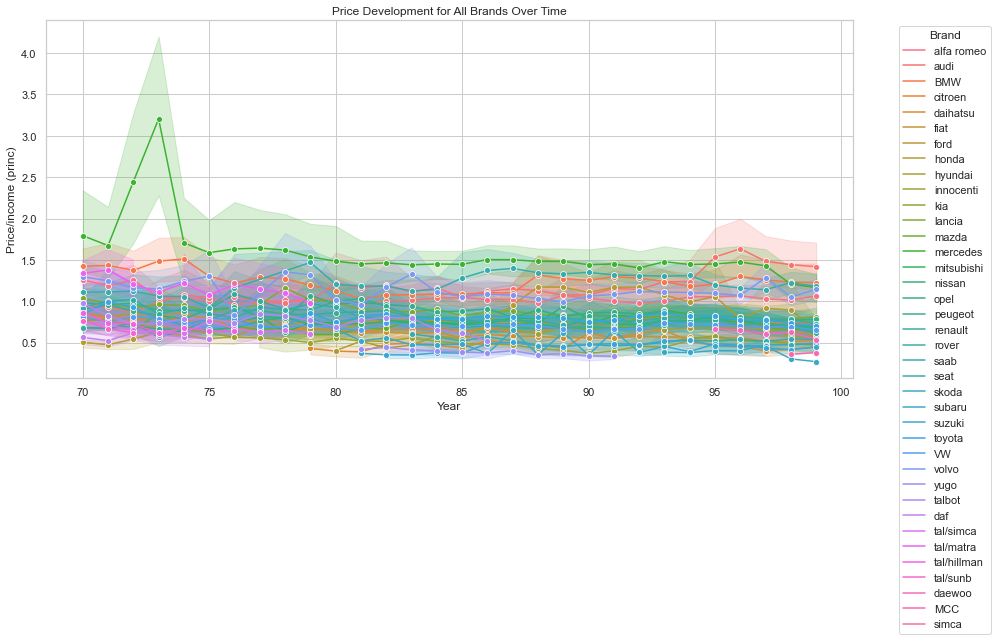

In [10]:
# Create a line plot showing the development of prices over years for all brands
plt.figure(figsize=(14, 8))
sns.lineplot(data=cars, x='ye', y='princ', hue='brand', marker='o', legend='full')
plt.title('Price Development for All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Price/income (princ)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()

#lave nogle grafer for at se hvad der er i variablerne - variable over tid
#Giver det mening at tage pris/indkomst (lokal valuta) på tværs af lande (med inflation) - læse verbovens paper mm. for hvilke mål
#Enheden i prices
#Faste og løbende priser - inflation => rene priser= fjerne inflation samt
#Giver det mening med priser for brands


# Using regplot for a Single Scatterplot with Regression Line


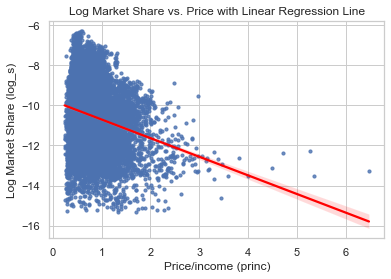

In [11]:
#regplot is a seaborn function for plotting a regression line for two variables along with a scatterplot. 
#It is a simpler function that is good for quick, straightforward plots.

# Use seaborn's regplot to create a scatterplot of 'pr' vs. 'log_s'.
# 'x' specifies the data for the x-axis (Price in this case).
# 'y' specifies the data for the y-axis (Log Market Share in this case).

sns.regplot(x='princ', y='log_s', data=cars, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set the title of the plot with plt.title.
plt.title('Log Market Share vs. Price with Linear Regression Line')

# Set the label for the x-axis with plt.xlabel.
plt.xlabel('Price/income (princ)')

# Set the label for the y-axis with plt.ylabel.
plt.ylabel('Log Market Share (log_s)')

# Display the plot with plt.show().
plt.show()


#Variationen skyldes attributes og uobserverede mm. målefejl
#


#Noter til næste gang:
#Beskrive hvad delkonklusionerne viser - 100% styr på grafer

#Negativ sammenhæng for 2 variable - finde ud af med flere
#Estimere attributes

Den er vigtig den her 
- Præcis det vi gør med vores data
- Lad os lave flere af dem her
    - Nøglen til opgaven
    - Hvad hvis vi gjorde det for forskellige lande
    - Kontrollere for attributes også (hvis man kan)
- Man kunne måske lave bin scatter plot
    - Regne betinget gennemsnit af market shares indenfor nogle kategorier
        - Gennemsnittet af marketshares
        - Behøver måske ikke at være lineær
        - Den sidste linjes konfidensinterval holder ikke helt (måske)
        - Måske kigge på standardfejlen derude

**Prisfølsomhed**: Det antyder, at der er prisfølsomhed på markedet. En **højere pris i forhold til indkomst** kan gøre en bil **mindre attraktiv for forbrugerne**, hvilket fører til en **lavere markedsandel**.

**Indkomsteffekt**: Hvis princ repræsenterer prisen på en bil i forhold til gennemsnitsindkomsten, så som **biler bliver dyrere i forhold til forbrugernes indkomst**, kan **færre mennesker have råd til dem**, hvilket resulterer i en **lavere markedsandel**.

**Substitutionseffekt**: Når prisen på en bil stiger, kan forbrugerne skifte til alternative mærker eller modeller, der tilbyder bedre værdi for pengene, hvilket igen fører til en lavere markedsandel for de dyrere muligheder.

**Efterspørgselens elasticitet**: Den **negative korrelation** kan afspejle **efterspørgselens elasticitet for biler**. Biler kunne være et relativt elastisk gode, hvilket betyder, at **efterspørgslen ændrer sig betydeligt med prisændringer**.

# Integrate this into the regression setup - Only with prices

**Alpha-værdien i en OLS-regressionsmodel**: 
- I regressionstabbeln nedenfor bliver alpha-værdien angivet som koefficienten for 'const' og er -5.1796. Det betyder, at **når prisen og alle andre uafhængige variabler er nul, er den forventede logaritmiske markedsandel -5.1796**.
- Er koefficienten for konstantleddet, som repræsenterer det punkt, hvor regressionslinjen skærer y-aksen, når alle uafhængige variabler er nul. 

**Den uafhængige variabel i din model er prisen ('pr')**
- Koefficient = -1.435e-08. Dette indikerer, at for hver stigning i pris, forventes den logaritmiske markedsandel at falde med -1.435e-08, mens alle andre faktorer holdes konstante. Dette afspejler den **negative sammenhæng mellem pris og markedsandel**; (som også er vist tidligere). 

In [12]:
# Replace 'pr', 'hp' etc., with the actual attribute names you want to include
cars['princ'] = pd.to_numeric(cars['princ'], errors='coerce')
# Convert additional attributes as needed

# Replace any infinite values with NaN and then drop rows with NaN values in these columns
cars.replace([np.inf, -np.inf], np.nan, inplace=True)
cars.dropna(subset=['princ'], inplace=True)  # Include all your predictor columns in the subset list

# Prepare your independent variables DataFrame including the constant and other variables
X = cars[['princ']]  # I can add more attributes if it is needed
X = sm.add_constant(X)

# Define your dependent variable
y = cars['log_s']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of your regression model
print(model.summary())

print(cars.shape)

# Evt. nye tal da det er ændret til princ


                            OLS Regression Results                            
Dep. Variable:                  log_s   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     669.6
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.45e-143
Time:                        16:32:02   Log-Likelihood:                -21681.
No. Observations:               11549   AIC:                         4.337e+04
Df Residuals:                   11547   BIC:                         4.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7708      0.033   -294.884      0.0

Konstanten er startpunktet - Det matcher perfekt med grafen foroven
- Hældningen er princ

I regressionstabellen med fokus på prisen ser vi følgende:

- **Konstanten i modellen**: D
    - Forkert, der er bare attributes and prices
    - Nytten af outide good er 0
        - Normalisering, som bliver fanget af konstanten
- princ:
    - Priscoefficienten er alpha
    - Ingen beta da der ikke er nogen x'er

- **R-kvadreret (R-squared)**: Dette tal viser, **hvor stor en del af variationen i logaritmisk markedsandel vores model kan forklare**. Med en værdi på 0.05 forklarer modellen en okay del
    - Adjusted
        - Forklarende variable
            - 1000 variable som ikke gør noget bliver den lavere

- **Koefficient (coef)**: Tallet ved 'pr' viser ændringen i logaritmisk markedsandel for hver ændring i pris. Med en værdi på **-1.435e-08** indikerer det, at **en stigning i pris fører til en fald i markedsandelen.**



- **Standardfejl (std err)**: Dette måler usikkerheden omkring vores koefficientestimat. En lille værdi, som her 1.74e-09, betyder, at vi er ret sikre på vores estimering af prissens effekt.

- **t-værdi**: Dette tal viser, **hvor mange standardfejl vores koefficient er fra nul**. En høj absolut værdi som -311.633 for konstanten og -8.243 for prisen tyder på en stærk effekt.
    - Coeff
    - Significant
        - Den er større end 2 da den er signifikant
        - 97,5% for dobbeltside test
    - t-værdien:
        - Numerisk større end 2, med sikkerhed afvise koefficienten er større end 2
        - Hvis 0 var konfidensinterval, var t mindre og P ...

- **P-værdi (P>|t|)**: Dette er sandsynligheden for at se en effekt som den observerede, hvis den sande effekt er nul. Da værdien er 0.000, er både konstanten og prisen statistisk signifikante.
    - Hvis 0,5 kan vi ikke afvise hypotesen

- **Konfidensinterval ([0.025, 0.975])**: Dette interval giver os en række værdier, hvor vi kan være 95% sikre på at finde den sande koefficient. For prisen ligger dette interval mellem -1.78e-08 og -1.09e-08.

- Skew:
    - Skewness er 0 for normalfordeling
        - Her er der lidt skewness

Behøver ikke vise - Lineære modeller er efficient
- Jarque test:
    - Fejlledene er normaltfordelte
        - Kurtosis burde være 3 for normalfordeling
    - Teststørerlse er store, så vi langt fra h0 (nulnypotese)
    - Prob(JB) er lille og kan afvises at det er normaltfordelt
    
    
Noten nederst i tabellen henviser til, at den meget store betingelsesnummer kan indikere et problem med multicollinearitet eller andre numeriske problemer, men da der kun er én forklarende variabel, kan dette også skyldes skalaen af de involverede variabler.

# Integrate this into the regression setup: 

# Er det mon nødvendigt at redefinere dette på, da vi sammenligner OLS og IV på denne måde som er defineret?

import statsmodels.formula.api as smf
cars_est = cars.copy()


#cars_est['country_category'] = cars_est['country'].astype('category')
cars_est['cla_category'] = cars_est['class'].astype('category')
cars_est['home_category'] = cars_est['home'].astype('category')


ols_model_all = smf.ols('log_s ~  pr_dollar_inc +li +we+hp +Fuel_price_ann_dollar + cla_category + home_category', data=cars_est).fit(cov_type='HC3')
ols_model_wo_weight = smf.ols('log_s ~  pr_dollar_inc +li +hp +Fuel_price_ann_dollar + cla_category + home_category', data=cars_est).fit(cov_type='HC3')
ols_model_all_wo_class = smf.ols('log_s ~  pr_dollar_inc +li +we+hp +Fuel_price_ann_dollar  + home_category', data=cars_est).fit(cov_type='HC3')
ols_model_hp = smf.ols('log_s ~ pr_dollar_inc +li +we +Fuel_price_ann_dollar + cla_category + home_category', data=cars_est).fit(cov_type='HC3')


ols_model_all_results = pd.DataFrame({
    'Coefficient': ols_model_all.params,
    'Std. Error': ols_model_all.bse,
    't-value': ols_model_all.tvalues,
    'p-value': ols_model_all.pvalues,
})

ols_model_wo_weight_results = pd.DataFrame({
    'Coefficient': ols_model_wo_weight.params,
    'Std. Error': ols_model_wo_weight.bse,
    't-value': ols_model_wo_weight.tvalues,
    'p-value': ols_model_wo_weight.pvalues
})


ols_model_all_wo_class_results = pd.DataFrame({
    'Coefficient': ols_model_all_wo_class.params,
    'Std. Error': ols_model_all_wo_class.bse,
    't-value': ols_model_all_wo_class.tvalues,
    'p-value': ols_model_all_wo_class.pvalues
})

ols_model_hp_results = pd.DataFrame({
    'Coefficient': ols_model_hp.params,
    'Std. Error': ols_model_hp.bse,
    't-value': ols_model_hp.tvalues,
    'p-value': ols_model_hp.pvalues
})






# Combine the results into one DataFrame for comparison
comparison_table = pd.DataFrame({
    'OLS Coefficient (All)': ols_model_all_results['Coefficient'],
    'Std. Error Coefficient (All)': ols_model_all_results['Std. Error'],
    'OLS Coefficient (w/o we)': ols_model_wo_weight_results['Coefficient'],
    'Std. Error Coefficient (w/o we)': ols_model_wo_weight_results['Std. Error'],
    'OLS Coefficient (w/o hp)': ols_model_hp_results['Coefficient'],
    'Std. Error Coefficient (w/o hp)': ols_model_hp_results['Std. Error'],
    'OLS Coefficient (w/o cla)': ols_model_all_wo_class_results['Coefficient'],
    'Std. Error Coefficient (w/o cla)': ols_model_all_wo_class_results['Std. Error']
})
comparison_table
latex_table = comparison_table.to_latex(index=True)
#print(latex_table)
#latex_table


# R squared
r_squared_all = ols_model_all.rsquared
r_squared_wo_weight = ols_model_wo_weight.rsquared
r_squared_all_wo_class = ols_model_all_wo_class.rsquared
r_squared_hp = ols_model_hp.rsquared

print('All:',r_squared_all,'wo weight:',r_squared_wo_weight,'we hp:',r_squared_hp,'wo cla:',r_squared_all_wo_class)


comparison_table_p = pd.DataFrame({
    'OLS Coefficient (All)': ols_model_all_results['Coefficient'],
    'Std. Error Coefficient (All)': ols_model_all_results['p-value'],
    'OLS Coefficient (w/o we)': ols_model_wo_weight_results['Coefficient'],
    'Std. Error Coefficient (w/o we)': ols_model_wo_weight_results['p-value'],
    'OLS Coefficient (w/o hp)': ols_model_hp_results['Coefficient'],
    'Std. Error Coefficient (w/o hp)': ols_model_hp_results['p-value'],
    'OLS Coefficient (w/o cla)': ols_model_all_wo_class_results['Coefficient'],
    'Std. Error Coefficient (w/o cla)': ols_model_all_wo_class_results['p-value']
})
comparison_table_p



In [13]:
# Convert all predictor variables to numeric type and handle missing/infinite values
cars['pr'] = pd.to_numeric(cars['pr'], errors='coerce')
cars['hp'] = pd.to_numeric(cars['hp'], errors='coerce')
cars['ac'] = pd.to_numeric(cars['ac'], errors='coerce')

# Replace any infinite values with NaN and then drop rows with NaN values in these columns
cars.replace([np.inf, -np.inf], np.nan, inplace=True)
cars.dropna(subset=['pr', 'hp', 'ac'], inplace=True)  # Include all the predictor columns in the subset list

# Preparing the independent variables DataFrame including the constant and other variables
X = cars[['pr', 'hp', 'ac']]  # I can add more attributes if it is needed
X = sm.add_constant(X)

# Defining the dependent (afhængige) variable
y = cars['log_s']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of your regression model
print(model.summary())


# Deskriptive - linear analyse:
# korrelere mod attributes og prices - prisen er korrileret med fejlledet (lædersædder osv)
# Vises med de korrilerbar attributes, så også med de 
# Udlader en varaible:
# Prisen er endogen da de simultant bestemt
# Fejlledet er korreleret med prisen, så vi prøver at estimere alpha alligevel med instrumentvariable:
# endogenitet: så prøver vi at korrelere fejlledet, men ingen data for det
# Potentielle attributes for fejlledet (lædersæder osv.) er korreleret med prisen og kan skabe et endogenitetsproblem



# Bruge et instrumentvariabel for at kontrollere for udbud og efterspørgsel
# Det skubber efterspørgslen op og ned
# BLP instrumenterne - Hvor meget horsepower og acceleration er der allerede i markedet
# Instrumenter for prisen - De er i Anders' slides og i BLP paper
# Ideen med at finde instrument: Korreleret med prisen, men uden at være korreleret med unobserved consumer taste
# Håndterer endogeniteten der kommer grundet ligevægten fra udbud og efterspørgsel
# For at estimere bruges instrumentvariable, ligning er en reduceret form for strukturelle ligninger - både udbud og efterspørgsel - Anders' slides
# når de er estimeret finder man priskoefficienten af marginal utility (alpha og beta)
# Herfra kan man sige noget om effekten på efterspørgslen
# Se på effekten af marginal omkostninger og potentielle andre variable for marginale omkostinnger
# Kan være IV
# når man har dem, efterspørgsel og margianale omkostninger kan ligevægten findes
 


                            OLS Regression Results                            
Dep. Variable:                  log_s   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     433.8
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.24e-263
Time:                        16:32:02   Log-Likelihood:                -17092.
No. Observations:                9232   AIC:                         3.419e+04
Df Residuals:                    9228   BIC:                         3.422e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5594      0.111    -77.088      0.0

Her er det pr i stedet for princ
- Positiv 
    - Prisen er endogen

OLS antagelserne for at udlede OLS estimatoren, som er konsistent via antagelserne:
- log_s = alpha*p + beta*x + epsilon
- x= horsepower and acceleration
- når man fjerner forklarende variable ryges det ud i fejlledet
    - forklarende variable korreleres med fejlled = skal være ukorrileret med fejlled
- betinget værdi af x&p =0
    - betinget middelværdi => E(epsilon|horsepower, acceleration, price) = 0 => 
        - we can estiamte alpha and beta consistently using OLS, but if horsepower is excluded from the regression, we have 
    - E(epsilon|acceleration, price) ≠ 0
        - dette er ikke længere betinget estimeret
    - Her er OLS ikke længere konsistent (jo mere data ≠ den sande værdi. Konvergere til noget forkert. Bias)
- Man kan estimere priserne uden 
- Fejlledet er korrileret af horsepower - effekt på prisen self

In [14]:
# Liste over attributter
attributes = ['princ', 'we', 'ac', 'hp', 'le']  # Erstat med dine attributter

# Regression kun med pris
X_price = sm.add_constant(cars[['princ']])  # Antag at 'princ' er prisen
model_price = sm.OLS(cars['log_s'], X_price).fit()
print(model_price.summary())

# Loop gennem hver attribut og kør regression med pris og den pågældende attribut
for attr in attributes:
    X_attr = sm.add_constant(cars[['princ', 'we', 'ac', 'hp', 'le']])  # Tilføj attributten til modellen
    model_attr = sm.OLS(cars['log_s'], X_attr).fit()
    print(f"Regression med pris og {attr}:")
    print(model_attr.summary())
    print("\n")
    
# Køre regressionerne country by country => se om princ ryger på minus
# Det er horsepower som påvirker princ - den går fra negativ til positiv, hvilket ikke burde være rigtigt

                            OLS Regression Results                            
Dep. Variable:                  log_s   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     579.0
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          3.96e-124
Time:                        16:32:02   Log-Likelihood:                -17421.
No. Observations:                9232   AIC:                         3.485e+04
Df Residuals:                    9230   BIC:                         3.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6165      0.037   -257.449      0.0

**Nonrobust/Robust covarians**:
- Benytte robuste standardfejl = større tillid til de statistiske tests og konfidensintervaller for regressionskoefficienterne, selv når der er heteroskedasticitet (ikke-konstant varians af fejlleddene) eller visse typer af afhængighed mellem fejlleddene.

**Nonrobust**:
- Standardfejlene til at estimere usikkerheden for regressionskoefficienterne, er baseret på de klassiske antagelser om homoskedasticitet - variansen af fejlleddet er konstant på tværs af observationerne. 
    - Hvis disse antagelser ikke holder, kan de standardfejl, der er beregnet under "nonrobust" antagelsen, være **misvisende**.

**"Robust" covarians**: 
- Brugen af robuste standardfejl, hvor beregningen tager højde for heteroskedasticitet (ikke-konstant varians af fejlleddene) eller andre former for modelmæssige specifikationsfejl. 
    - Dette gør skønnet af **standardfejlene mere pålideligt**, når de klassiske **antagelser om OLS-modellen er brudt**.
    

**F-Test**:
- Sammenligner variansen af 2 prøver

**Log-Likelihood**:
- Hvor godt modellen passer til dataene. Det er den naturlige logaritme af sandsynligheden for at observere de givne data under den estimerede model. **En højere værdi af log-likelihood indikerer en bedre modeltilpasning.** 

# Forklarende variabler og model-dummies i OLS-regression

In [15]:
# Tjekker for at sikre, at 'brand' kolonnen eksisterer
print(cars.columns)

# Hvis 'brand' eksisterer, opretter vi dummy-variabler
if 'brand' in cars.columns:
    cars = pd.get_dummies(cars, columns=['brand'], drop_first=True)
else:
    print("'brand' kolonnen findes ikke i DataFrame.")


Index(['ye', 'ma', 'co', 'zcode', 'brd', 'type', 'brand', 'model', 'org',
       'loc', 'cla', 'home', 'frm', 'qu', 'cy', 'hp', 'we', 'pl', 'do', 'le',
       'wi', 'he', 'li1', 'li2', 'li3', 'li', 'sp', 'ac', 'pr', 'princ',
       'eurpr', 'exppr', 'avexr', 'avdexr', 'avcpr', 'avppr', 'avdcpr',
       'avdppr', 'xexr', 'tax', 'pop', 'ngdp', 'rgdp', 'engdp', 'ergdp',
       'engdpc', 'ergdpc', 'qu_total', 's', 'log_s', 'country', 'class',
       'hp_bin', 'market_share_bin'],
      dtype='object')


In [16]:
# Antag at 'pr' er prisen, og 'hp' er hestekræfter
X = cars[['princ', 'hp']]  # Starter med prisen og hestekræfter
X = pd.concat([X, cars.filter(regex='brand_')], axis=1)  # Tilføjer brand-dummy-variablerne
X = sm.add_constant(X)  # Tilføjer en konstant til modellen - estimere den basale værdi af den afhængige variabel, når alle de uafhængige variabler er nul. 
#Det forbedrer modeltilpasningen og sikrer mere nøjagtige og realistiske estimater.

y = cars['log_s']  # Logaritmiske markedsandel

# Kører OLS-modellen
model = sm.OLS(y, X).fit()

# Viser summary af modellen
print(model.summary())

# Hvilket brands tages der fat i her?


                            OLS Regression Results                            
Dep. Variable:                  log_s   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     97.09
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:02   Log-Likelihood:                -16144.
No. Observations:                9232   AIC:                         3.237e+04
Df Residuals:                    9193   BIC:                         3.264e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.1395      0.09

- Princ
    - Fjernet brand-variation
    - Den der er tilbage til at identificere er den indenfor brands
        - Holder brands konstant
    - Mange køber billige biler, fås en negativ priskoefficient
    - Marketshare mod princ
        - Få koefficient
        - Her er endogenitetsproblemer
            - Kvalitetsforskel
            - Indenfor hvert bilmærke
                - Identificere prisændring for hvert brand
                - Gennemsnitslige marketshares ryger ud
                    - PRisen på mercedes stiger og køber flere
                        - Positiv koefficient 
- Coef:
    - Færre end den 
    
- Kun fortolke på princ
    - 2 koefficienter
    - Brand dummies og sætte et kryds i tabellen
        - Næste ingen kryds for brand dummies
            - I stedet for at præsentere tabellen
            
            
            
Price, attributes, dummies - Yes, ***

Horsepower og Weight = Super colineære

- for 

**Noter fra Bertel:**
- Den er negativ her, variation over tid og på tværs af markeder for de enkelte modeller
- Hvis vi tager mercedes med masser horsepower, masser af luksus gear har det en høj pris
    - Er det mon udbud eller efterspørgsel - endogenitetsproblem
- Mercedes ændrer horsepower for model fixed effects
    - Mere retvisende estimat
    - Håndteret noget af endogenitetsproblem
    - Moddelere gazays som er modeleret med priserne
        - Model fixed effect og timed fixed effects

**Resultaterne fra en OLS-regression**, hvor der er inkluderet en række **dummy-variabler** for forskellige bilmarken (brands). Resultaterne af hver koefficient for de enkelte mærker giver os estimater af, hvordan tilstedeværelsen af hvert brand påvirker den logaritmiske markedsandel

**Forklare Estimaterne**: Hver koefficient i tabellen skal fortolkes individuelt. For eksempel, **hvis koefficienten for et bestemt brand er negativ og statistisk signifikant**, kan det tyde på, at biler fra dette mærke har en **lavere markedsandel end baseline-kategorien**, når alle andre faktorer er holdt konstante.

**Baseline**
- Går ud fra Baselinen er Alfa Romero da det er den første bil i datasættet (også alfabetisk)
- Vises ikke i tabellen og den kategori, hvor alle dummy-variabler ville tage værdien 0. 

# 2SLS/IV-regression

In [17]:
# Log_s mod s and p => herfra estimere med IV, herunder have instrumenter (BLP beskriver summen)
# summen af attributes 

import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS


cars_IV = cars.copy()
# Tilføj en konstant til dataframen, hvis det er nødvendigt
cars_IV['Intercept'] = 1

# Definer variabler og instrumenter:
first_stage = smf.ols('princ ~ hp + ac + we + le', data=cars).fit(cov_type='HC3') # evt. adde flere kontrolvariable

# Tilføj de forudsagte værdier fra første trin til din dataframe
cars['princ_fitted'] = first_stage.predict()

first_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  princ   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2579.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:03   Log-Likelihood:                -324.77
No. Observations:                9232   AIC:                             659.5
Df Residuals:                    9227   BIC:                             695.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8830      0.033    -26.643      0.000      -0.948      -0.818
hp             0.0126      0.000     25.459      0.000       0.012       0.014
ac             0.0143      0.001     17.663      0.000       0.013       0.016
we          2.634e-05   4.09e-05      0.645      0.519   -5.37e-05       0.000
le             0.0018      0.000     12.745      0.000       0.001       0.002
==============================================================================
Omnibus:                     5357.132   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151112.618
Skew:                           2.267   Prob(JB):                         0.00
Kurtosis:                      22.295   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Resultaterne fra det første trin i IV-estimationen** 
- Her anvendes OLS til at forudsige værdien af den endogene variabel 'princ' ved hjælp af instrumentet 'hp' og andre forklarende variabler 'ac', 'we', og 'le'.
- Koefficienterne viser, hvordan hver variabel påvirker prisen.
- **R-squared-værdien er ret høj**, hvilket indikerer, at modellen forklarer en stor del af variationen i prisen.
- **Log-likelihood og andre statistiske tests viser**, hvor godt modellen passer til dataene.

- Price/Income er endogen(forklarende variable) her  
    - men ikke direkte korreleret med fejltermer i efterspørgselsligningen.
- **ac, we, og le er de eksogene variabler** 

In [18]:
# Adding the predicted values from the first stage
cars_IV['princ_fitted'] = first_stage.predict()

# Opretter modellen korrekt
second_stage = IV2SLS(dependent=cars_IV['log_s'],
                        exog=cars_IV[['Intercept', 'ac', 'we', 'le']],
                        endog=cars_IV['princ_fitted'],
                        instruments=cars_IV['hp']).fit()

# Udskriver modelresuméet
second_stage

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  log_s   R-squared:                      0.1500
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1497
No. Observations:                9232   F-statistic:                    1771.6
Date:                Mon, Feb 26 2024   P-value (F-stat)                0.0000
Time:                        16:32:03   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept       -14.584     0.2743    -53.173     0.0000     -15.121     -14.046
ac               0.0371     0.0042     8.9096     0.0000      0.0290      0.0453
we               0.0020     0.0002     9.2220     0.0000      0.0016      0.0025
le               0.0116     0.0008     14.306     0.0000      0.0100      0.0132
princ_fitted    -3.9034     0.1308    -29.849     0.0000     -4.1597     -3.6471
================================================================================

Endogenous: princ_fitted
Instruments: hp
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7ff2b987da90

**Andet trin i IV-estimationen** 
- 'princ_fitted' anvendes som en **erstatning for den oprindelige endogene variabel 'princ' i regressionen for at estimere effekten på den afhængige variabel 'log_s'**.
- **Interceptet er ekstremt lavt og standardfejlen er højere**, hvilket kan indikere potentiel **endogenitet i modellen**.
    - **Potentielt spørgsmål til Bertel:**
        - Hvor er der endogenitet i modellen?
- Denne tabel viser betydeligt forskellige estimater og standardfejl sammenlignet med OLS, hvilket **understreger den potentielle indflydelse af endogenitet.**

# Compare OLS and 2SLS

In [19]:
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

cars_IV = cars.copy()

# First Stage Regression: Regress 'pr_dollar_inc' on the instrument 'exchange_rate' and other exogenous variables
first_stage = smf.ols(formula="princ ~ hp + ac + we + le", 
                      data=cars_IV).fit(cov_type='HC3')

# Add the fitted values from the first stage to the DataFrame
cars_IV['princ_fitted'] = first_stage.fittedvalues

# Second Stage Regression: Use the fitted values as the 'endogenous' variable in place of 'princ'
second_stage = IV2SLS(dependent=cars_IV['log_s'], 
                      exog=cars_IV[['ac', 'we', 'le']], 
                      endog=cars_IV['princ_fitted'], 
                      instruments=cars_IV['hp']).fit()

second_stage

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  log_s   R-squared:                      0.9708
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9708
No. Observations:                9232   F-statistic:                 3.464e+05
Date:                Mon, Feb 26 2024   P-value (F-stat)                0.0000
Time:                        16:32:03   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
ac              -0.0952     0.0046    -20.647     0.0000     -0.1042     -0.0862
we               0.0057     0.0003     18.569     0.0000      0.0051      0.0063
le              -0.0272     0.0006    -45.708     0.0000     -0.0284     -0.0260
princ_fitted    -3.8536     0.1604    -24.029     0.0000     -4.1680     -3.5393
================================================================================

Endogenous: princ_fitted
Instruments: hp
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7ff2b9897e20

**Resultaterne fra et komplet 2SLS (IV) estimat**, -
- Den forudsagte værdi af **'princ'** (betegnet som 'princ_fitted') er brugt i det andet trin for at **estimere effekten på den logaritmisk-transformerede salgsvariabel 'log_s'.**
- **I modsætning til OLS-estimater viser IV-estimaterne**
    - Effekten af forklarende variabler under **antagelsen af, at prisen ('princ') er endogen.**
        - Antagelsen er håndteret ved at **anvende 'hp' som et instrument i det første trin.**
- Koefficienterne for variablerne **'ac', 'we', og 'le' samt for 'princ_fitted'** er sandsynligvis **justeret for den endogene pris.**
- **R-squared er meget høj**, hvilket er **usædvanligt for en IV-estimation og kan indikere over-identifikation eller andre problemer med modellen.**
    - **Spørgmsål til Bertel her**
        - Hvad forårsager dette?
- **T-statistik og p-værdierne** antyder, at **koefficienterne er statistisk signifikante.**

In [20]:
# Create a DataFrame for the OLS results
firststage_results = pd.DataFrame({
    'Coefficient': first_stage.params,
    'Std. Error': first_stage.bse,
    't-value': first_stage.tvalues,
    'p-value': first_stage.pvalues
})

# Create a DataFrame for the 2SLS results
secondstage_results = pd.DataFrame({
    'Coefficient': second_stage.params,
    'Std. Error': second_stage.std_errors,
    #'t-value': secondstage.tvalues,
    'p-value': second_stage.pvalues
})

# Combine the results into one DataFrame for comparison
comparison_table = pd.DataFrame({
    'OLS Coefficient': firststage_results['Coefficient'],
    '2SLS Coefficient': secondstage_results['Coefficient'],
    'OLS Std. Error': firststage_results['Std. Error'],
    '2SLS Std. Error': secondstage_results['Std. Error'],
    'OLS p-value': firststage_results['p-value'],
    '2SLS p-value': secondstage_results['p-value']
})
comparison_table

,OLS Coefficient,2SLS Coefficient,OLS Std. Error,2SLS Std. Error,OLS p-value,2SLS p-value
Intercept,-0.8830,NaN,0.0331,NaN,0.0000,NaN
ac,0.0143,-0.0952,0.0008,0.0046,0.0000,0.0000
hp,0.0126,NaN,0.0005,NaN,0.0000,NaN
le,0.0018,-0.0272,0.0001,0.0006,0.0000,0.0000
princ_fitted,NaN,-3.8536,NaN,0.1604,NaN,0.0000
we,0.0000,0.0057,0.0000,0.0003,0.5191,0.0000


**Interceptet** 
- Falder drastisk i 2SLS, hvilket viser en stor ændring i baselinjen for modellen, når endogenitet tages i betragtning.

- I OLS-modellen er interceptet (eller konstanten) -0.2675, men i 2SLS-modellen er det meget lavere (-14.5838). Det tyder på, at når endogenitet i variablerne tages i betragtning (som i 2SLS), ændrer den grundlæggende baseline for modellen sig betydeligt.
- Standardfejlen for interceptet i 2SLS-modellen er højere, hvilket tyder på mere usikkerhed omkring skønnet af interceptet i 2SLS-modellen sammenlignet med OLS-modellen.
- Begge modeller viser signifikante p-værdier for interceptet (0.0000), hvilket indikerer, at intercepterne er statistisk signifikante.

**Koefficienter for variabler** 
-  'ac' og 'hp' stiger i 2SLS, hvilket peger på en større effekt på den afhængige variabel efter at have justeret for endogenitet.

- For variable som 'ac' og 'hp', er koefficienterne i 2SLS-modellen højere end i OLS-modellen. Det antyder, at effekten af disse variabler på den afhængige variabel (formodentlig log_s) er større, når der tages højde for endogenitet.
- For 'princ_fitted', som formodentlig er den forudsagte værdi af prisen (eller en anden endogen variabel), viser 2SLS-modellen en meget stærk effekt (-3.9034), som ikke er til stede i OLS-modellen. Dette kunne indikere, at når den potentielle endogenitet i prisen kontrolleres, har den en stærk og signifikant effekt på den afhængige variabel.

**Standardfejl i 2SLS**
- højere, hvilket afspejler den typiske afvejning i IV-estimation: potentielt mindre bias, men større varians.

- Standardfejlene i 2SLS-modellen er generelt højere end i OLS-modellen, hvilket er typisk for IV/2SLS-estimater, da de ofte er mindre præcise end OLS-estimater

**Signifikansniveauer** 
- forbliver høje (p-værdier på 0.0000), hvilket bekræfter de statistisk signifikante effekter af interceptet og de fleste variabler i begge modeller.

- Der hvor der er 'NaN' under OLS-koefficienter og standardfejl, kunne det indikere, at disse variabler ikke var inkluderet i OLS-modellen, eller at der var en fejl ved beregningen.
- De p-værdier, der er angivet som 0.0000, tyder på, at de tilsvarende koefficienter er statistisk signifikante i både OLS og 2SLS-modellerne.

**Spørgsmål til Bertel:**
- Er dette rigtigt lavet og skal vi eventuelt ændre måden vi definerer OLS på?
    - Tror ikke der er gjort brug af fixed effects, kan det så bruges?
- Hvilke kontrolvariable kunne man yderligere inkludere?

# Priselasticiteter

Priselasticitet for en specifik variabel $x_{ik}$ med hensyn til sandsynligheden $p_{ij}$ for at vælge alternativ $j$ givet attributterne $x_i$ er defineret som:

$$E_{i,z_{ni}} = \frac{\partial P_{ni}}{\partial z_{ni}} \frac{z_{ni}}{P_{ni}}= \frac{\partial V_{ni}}{\partial z_{ni}} P_{ni} (1-P_{ni}) \frac{z_{ni}}{P_{ni}} = \frac{\partial V_{ni}}{\partial z_{ni}} z_{ni} (1-P_{ni})$$

- $\frac{ \partial p_{ij}}{\partial x_{ik}}$
    - Absolutte ændring = Den afledte
-  Eks:
    - Ændringen er 10% point fra 40 til 50
        - dp=10
        - p=40
    - Procentvis ændring:
        - dp/p=0,25 = procentvise ændring i p
        - dz/z => procentvise ændring i z
    - Priselasticiteten er dp/p/(dz/z) = dp/dz * z/p
        - Hvor meget ændrer p sig når z ændres i nogle procent
- $V = \alpha p * \beta x$
- $z_{ni}$ 
    - pris eller attributes

## Egenpriselasticitet

Når $k=j$, er egenpriselasticiteten givet ved:

$$E_{i,z_{ni}} = \beta_{z} z_{ni} (1 - P_{ni}) $$
- V = z*beta + epsilon
- Efterspørgslen ændrer sig for hvor meget man ændrer prisen => Alle valutaer ikke i 

Dette udtrykker, hvordan sandsynligheden for at vælge et specifikt alternativ ændrer sig, når prisen på det alternativ ændres, mens alle andre priser holdes konstante.

## Krydspriselasticitet

Når $k \neq j$, og under antagelsen om uafhængighed af irrelevante alternativer (IIA), er krydspriselasticiteten givet ved:

$$E_{j,x_{ik}} = -p_{ik} x_{ik} \beta$$

Dette måler ændringen i sandsynligheden for at vælge et alternativ som følge af ændringer i prisen på et andet alternativ.
 

In [46]:

J=5             # number of alternatives index j=0,..,J-1
N=10000         # number of observations
theta=np.array([1, -1, 2]).reshape(-1,1)  # True parameters
res=logit(cars['brand'], cars['x'], deriv=0)  # Estimate logit model

NameError: name 'logit' is not defined

# Estimating demand without bias

In [39]:
print(cars.columns)

X = sm.add_constant(cars['princ'])  # Adding a constant for the intercept
y = cars['brand_rover']  # Binary outcome for a specific brand, e.g., 'brand_rover'

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Index(['ye', 'ma', 'co', 'zcode', 'brd', 'type', 'model', 'org', 'loc', 'cla',
       'home', 'frm', 'qu', 'cy', 'hp', 'we', 'pl', 'do', 'le', 'wi', 'he',
       'li1', 'li2', 'li3', 'li', 'sp', 'ac', 'pr', 'princ', 'eurpr', 'exppr',
       'avexr', 'avdexr', 'avcpr', 'avppr', 'avdcpr', 'avdppr', 'xexr', 'tax',
       'pop', 'ngdp', 'rgdp', 'engdp', 'ergdp', 'engdpc', 'ergdpc', 'qu_total',
       's', 'log_s', 'country', 'class', 'hp_bin', 'market_share_bin',
       'brand_MCC', 'brand_VW', 'brand_alfa romeo', 'brand_audi',
       'brand_citroen', 'brand_daewoo', 'brand_daf', 'brand_daihatsu',
       'brand_fiat', 'brand_ford', 'brand_honda', 'brand_hyundai',
       'brand_innocenti', 'brand_kia', 'brand_lancia', 'brand_mazda',
       'brand_mercedes', 'brand_mitsubishi', 'brand_nissan', 'brand_opel',
       'brand_peugeot', 'brand_renault', 'brand_rover', 'brand_saab',
       'brand_seat', 'brand_simca', 'brand_skoda', 'brand_subaru',
       'brand_suzuki', 'brand_tal/hillman', 'brand

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


# Næste gang
- IV - Give den en skalle - Hvis fejl, fortælle hvor man sidder fast og hvad man har gjort
- priselasticiteter, egenpris, og krydspris - læse trains kapitel og dette - beskrivelse af modellen
    - Når man har dem, beregne marginal cost - Skrive hvad man har gjort og mangler til Bertel og give et overblik
- Datasæt for marginal cost
- Regression for prices mod attributes
- Tolke på resultater - fejlkilder, hvad der skal hjælp til

#1. Estimer efterspørgsel med IV - evt. fixed effects

#2. Så er efterspørgslen estimeret uden bias - det er logit modellen

#3. FOC til marginale omkostninger - er i slides

#4. Regressere de marginale omkostnigner mod attributes